## 1. Library Import

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from subprocess import call
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

import sklearn
from imblearn.over_sampling import SMOTE

In [2]:
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [83]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## 2. Modeling

#### Raw data 호출

In [3]:
plate = pd.read_csv("/home/piai/POSCO/Project/plate.csv")

#### 층별화 Data 호출

In [4]:
plate_c = pd.read_csv("/home/piai/POSCO/Project/plate_c.csv")
plate_t = pd.read_csv("/home/piai/POSCO/Project/plate_t.csv")

In [5]:
plate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scale            994 non-null    object 
 1   steel_kind       994 non-null    object 
 2   hsb              994 non-null    object 
 3   fur_avg_temp     994 non-null    float64
 4   fur_total_time   994 non-null    int64  
 5   rolling_method   994 non-null    object 
 6   rolling_temp     994 non-null    int64  
 7   descaling_count  994 non-null    int64  
 8   work_group       994 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.0+ KB


In [6]:
print(plate_c['hsb'].value_counts(), "\n")
print(plate_c['rolling_method'].value_counts(), "\n")
print(plate_c['work_group'].value_counts(), "\n")

print(plate_t['hsb'].value_counts(), "\n")
print(plate_t['rolling_method'].value_counts(), "\n")
print(plate_t['work_group'].value_counts(), "\n")

적용     716
미적용     37
Name: hsb, dtype: int64 

CR(제어압연)    753
Name: rolling_method, dtype: int64 

4조    210
1조    207
2조    169
3조    167
Name: work_group, dtype: int64 

적용     231
미적용     10
Name: hsb, dtype: int64 

TMCP(온도제어)    158
CR(제어압연)       83
Name: rolling_method, dtype: int64 

2조    121
1조     72
3조     48
Name: work_group, dtype: int64 



#### 범주형 설명변수 더미 변환

In [7]:
plate_c_dummy = pd.get_dummies(plate_c.drop(columns=['scale']))
plate_t_dummy = pd.get_dummies(plate_t.drop(columns=['scale']))

plate_c_dummy['scale'] = plate_c['scale']
plate_t_dummy['scale'] = plate_t['scale']

#### 탄소강(C) data train, test split

In [8]:
# 데이터 분리:설명변수, 목표변수 구분
plate_c_x = plate_c_dummy.drop("scale", axis = 1, inplace = False)
plate_c_y = plate_c_dummy["scale"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
plate_c_train_x, plate_c_test_x, plate_c_train_y, plate_c_test_y = train_test_split(
    plate_c_x, plate_c_y, test_size = 0.3, random_state = 1538) 

print("분할 전 설명변수 데이터:", plate_c_x.shape)
print("분할 후 설명변수 데이터: Train", plate_c_train_x.shape, " Test",plate_c_test_x.shape)

분할 전 설명변수 데이터: (753, 12)
분할 후 설명변수 데이터: Train (527, 12)  Test (226, 12)


#### 티타늄(Ti) data train, test split

In [9]:
# 데이터 분리:설명변수, 목표변수 구분
plate_t_x = plate_t_dummy.drop("scale", axis = 1, inplace = False)
plate_t_y = plate_t_dummy["scale"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
plate_t_train_x, plate_t_test_x, plate_t_train_y, plate_t_test_y = train_test_split(
    plate_t_x, plate_t_y, test_size = 0.3, random_state = 1538) 

print("분할 전 설명변수 데이터:", plate_t_x.shape)
print("분할 후 설명변수 데이터: Train", plate_t_train_x.shape, " Test", plate_t_test_x.shape)

분할 전 설명변수 데이터: (241, 12)
분할 후 설명변수 데이터: Train (168, 12)  Test (73, 12)


In [10]:
display(plate_c.head(10))
display(plate_c_x.head(10))

scale steel_kind hsb  fur_avg_temp  fur_total_time rolling_method  \
0    양품          C  적용        1127.5             297       CR(제어압연)   
1    양품          C  적용        1136.0             235       CR(제어압연)   
2    양품          C  적용        1130.0             240       CR(제어압연)   
3    양품          C  적용        1130.0             287       CR(제어압연)   
4    양품          C  적용        1135.5             286       CR(제어압연)   
5    양품          C  적용        1137.0             284       CR(제어압연)   
6    양품          C  적용        1136.5             284       CR(제어압연)   
7    양품          C  적용        1133.0             251       CR(제어압연)   
8    양품          C  적용        1138.5             273       CR(제어압연)   
9    양품          C  적용        1139.5             285       CR(제어압연)   

   rolling_temp  descaling_count work_group  
0           934                8         2조  
1           911                8         2조  
2           935               10         2조  
3           935               10         2조  
4           915               10         2조  
5           923               10         2조  
6           913               10         2조  
7           977                8         2조  
8           985                8         2조  
9           955               10         2조

fur_avg_temp  fur_total_time  rolling_temp  descaling_count  steel_kind_C  \
0        1127.5             297           934                8             1   
1        1136.0             235           911                8             1   
2        1130.0             240           935               10             1   
3        1130.0             287           935               10             1   
4        1135.5             286           915               10             1   
5        1137.0             284           923               10             1   
6        1136.5             284           913               10             1   
7        1133.0             251           977                8             1   
8        1138.5             273           985                8             1   
9        1139.5             285           955               10             1   

   hsb_미적용  hsb_적용  rolling_method_CR(제어압연)  work_group_1조  work_group_2조  \
0        0       1                        1              0              1   
1        0       1                        1              0              1   
2        0       1                        1              0              1   
3        0       1                        1              0              1   
4        0       1                        1              0              1   
5        0       1                        1              0              1   
6        0       1                        1              0              1   
7        0       1                        1              0              1   
8        0       1                        1              0              1   
9        0       1                        1              0              1   

   work_group_3조  work_group_4조  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  
5              0              0  
6              0              0  
7              0              0  
8              0              0  
9              0              0

In [13]:
print(plate_c.value_counts(["scale"]),"\n")
print("불량 비율", plate_c.value_counts(plate_c["scale"]=='불량')/len(plate_c),"\n")

print(plate_t.value_counts(["scale"]),"\n")
print("불량 비율", plate_t.value_counts(plate_c["scale"]=='불량')/len(plate_t))

scale
양품       463
불량       290
dtype: int64 

불량 비율 scale
False    0.614874
True     0.385126
dtype: float64 

scale
양품       221
불량        20
dtype: int64 

불량 비율 scale
True     0.543568
False    0.456432
dtype: float64


+ 탄소강 data 불량 비율 = 0.385
+ 티타늄 data 불량 비율 = 0.456

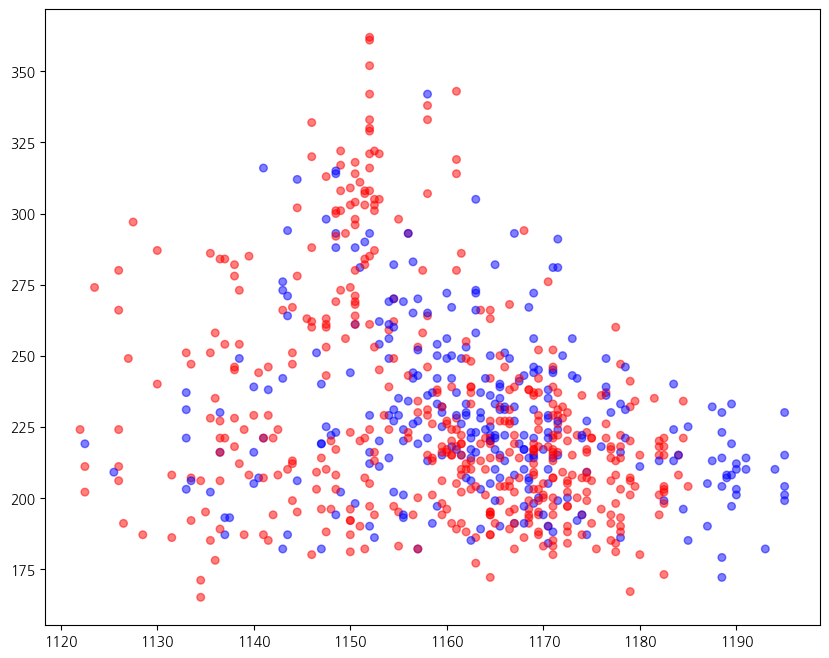

In [14]:
plt.figure(figsize=(10,8))

# 색깔 지정
plate_c['color'] = np.where(plate_c["scale"]=='양품', "red", "blue")
plt.scatter(plate_c['fur_avg_temp'], plate_c['fur_total_time'], c=plate_c['color'], s=30, alpha=0.5)

plt.show()

+ 탄소강 data 확인 결과 Oversampling이 불필요할 것으로 판단됨.

### 2-1. Decision Tree - 탄소강 data

#### Default model

In [15]:
tree_uncust = DecisionTreeClassifier(random_state=1538)
tree_uncust.fit(plate_c_train_x, plate_c_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(plate_c_train_x, plate_c_train_y)))

# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(plate_c_test_x, plate_c_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.973


In [16]:
# 실행옵션 확인
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1538, 'best'])


#### Hyper parameter tuning: max_depth

In [17]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(3, 12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1538)
    tree.fit(plate_c_train_x, plate_c_train_y)
    train_accuracy.append(tree.score(plate_c_train_x, plate_c_train_y))
    test_accuracy.append(tree.score(plate_c_test_x, plate_c_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [18]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      3          0.953         0.925
1      4          0.966         0.947
2      5          0.968         0.947
3      6          0.996         0.982
4      7          0.998         0.973
5      8          0.998         0.973
6      9          1.000         0.973
7     10          1.000         0.973
8     11          1.000         0.973

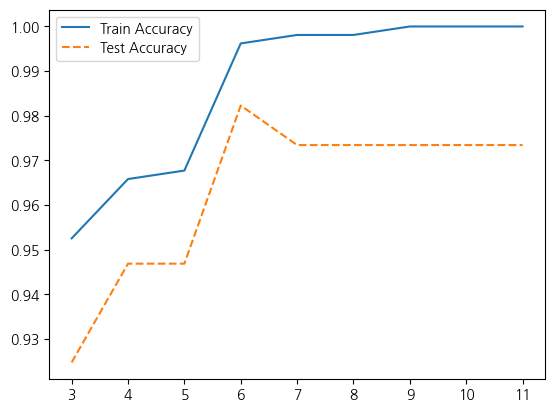

In [19]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

+ min_sample_leaf = 6으로 지정.

In [20]:
# 변수명 저장
v_feature_name = plate_c_train_x.columns

#### max_depth tuning 결과 시각화

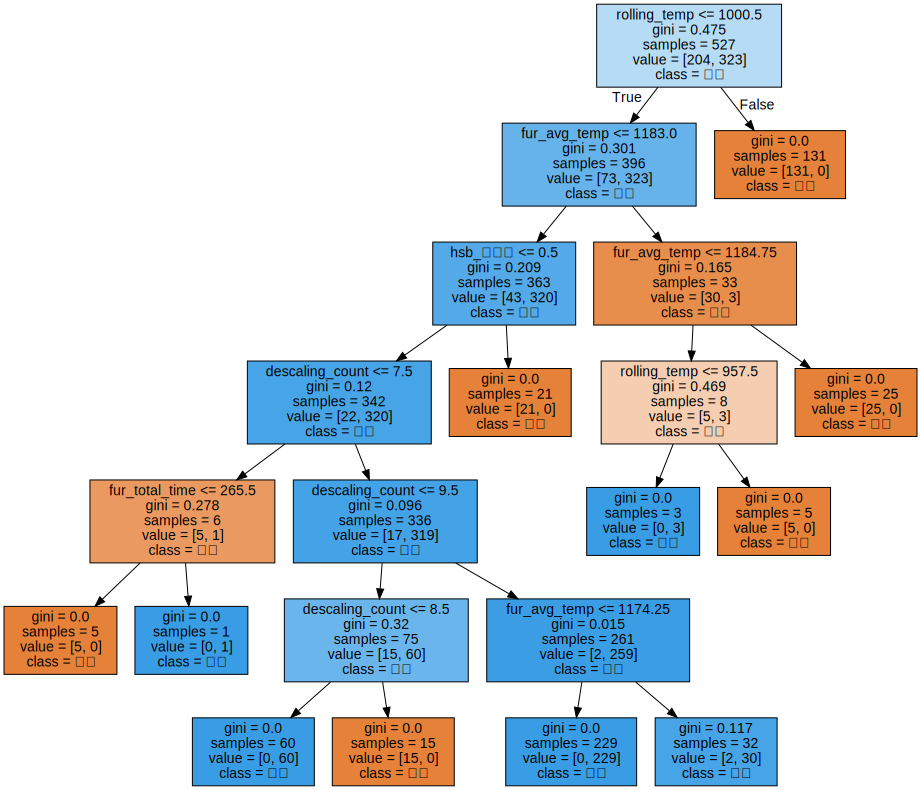

In [22]:
tree_low = DecisionTreeClassifier(max_depth = 6, random_state=1538)
tree_low.fit(plate_c_train_x, plate_c_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["불량", "양품"], 
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [23]:
call(['dot', '-Tpng', 'tree_low.dot', '-o', 'tree_low.png', '-Gdpi=600'])
Image(filename = 'tree_low.png')

#### Hyper parameter tuning: min_samples_split

In [34]:
train_accuracy = []; test_accuracy = []
para_split = [n_split for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth=6, random_state=1538)
    tree.fit(plate_c_train_x, plate_c_train_y)
    train_accuracy.append(tree.score(plate_c_train_x, plate_c_train_y))
    test_accuracy.append(tree.score(plate_c_test_x, plate_c_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [35]:
# 모델 정확도 확인
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0                 2          0.996         0.982
1                 3          0.996         0.982
2                 4          0.996         0.982
3                 5          0.996         0.982
4                 6          0.996         0.982
5                 7          0.994         0.982
6                 8          0.994         0.982
7                 9          0.989         0.978
8                10          0.989         0.978
9                11          0.989         0.978
10               12          0.989         0.978
11               13          0.989         0.978
12               14          0.989         0.978
13               15          0.989         0.978

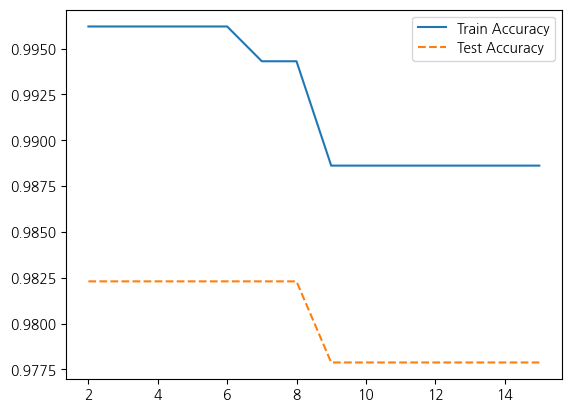

In [36]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

+ min_samples_split = 8으로 설정.

#### min_samples_split tuning 결과 시각화

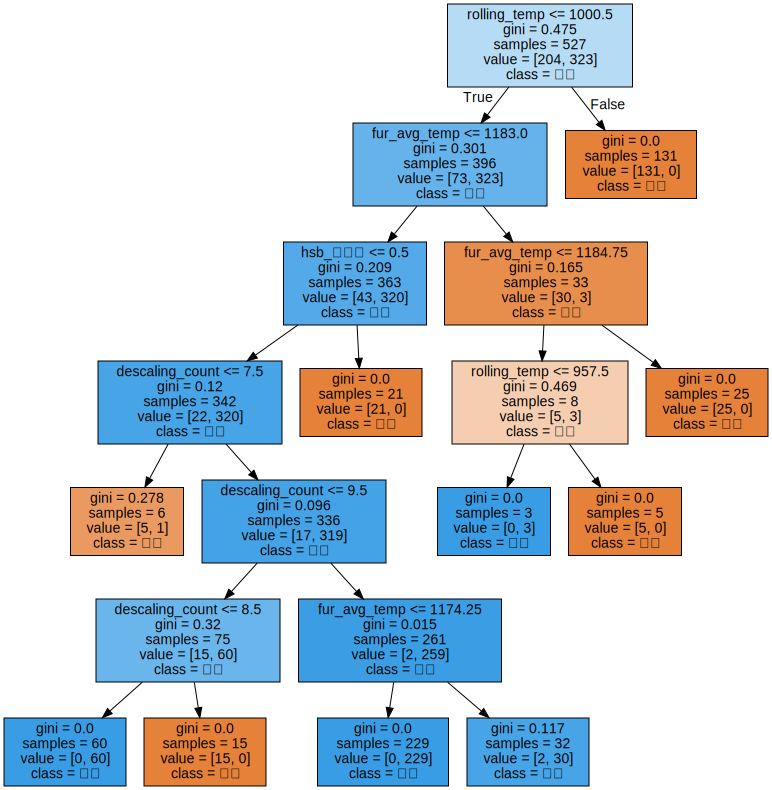

In [37]:
tree_low = DecisionTreeClassifier(max_depth=6, min_samples_split=8, random_state=1538)
tree_low.fit(plate_c_train_x, plate_c_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["불량", "양품"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

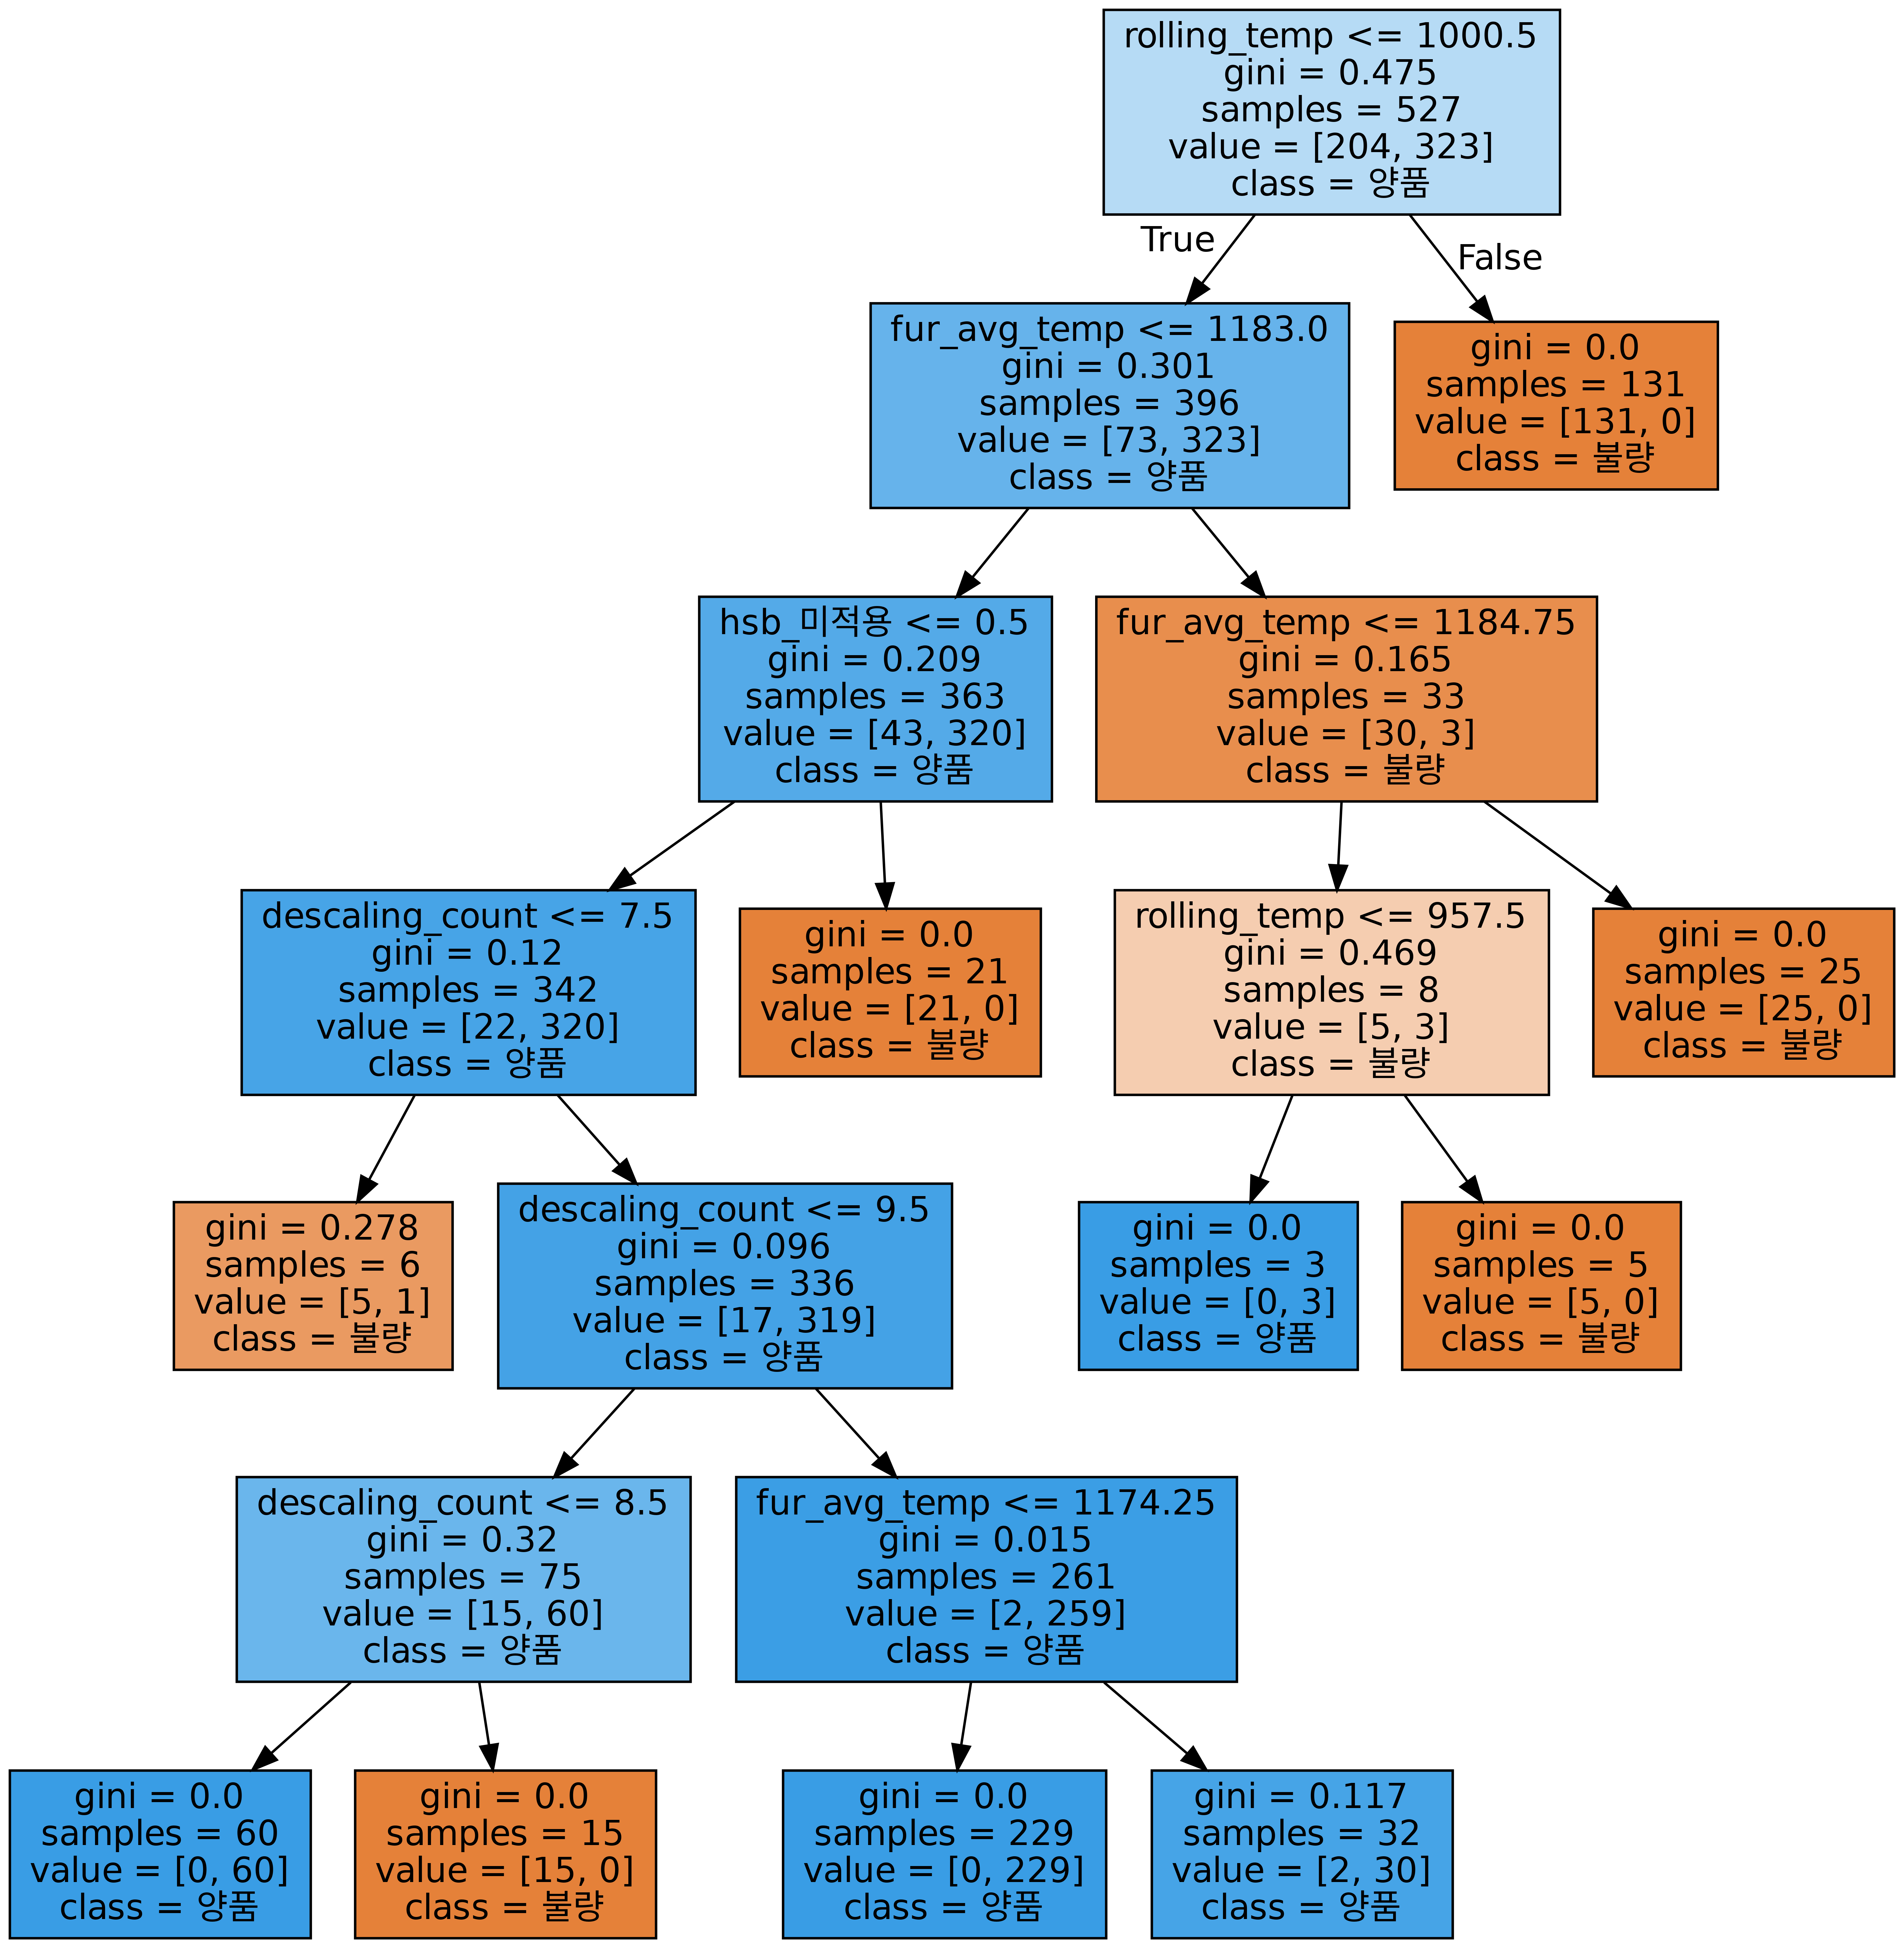

In [38]:
call(['dot', '-Tpng', 'tree_low.dot', '-o', 'tree_low.png', '-Gdpi=600'])
Image(filename = 'tree_low.png')

#### Hyper parameter tuning: min_samples_leaf

In [39]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf for n_leaf in range(5, 16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf,
                                  max_depth=6, min_samples_split=8, random_state=1538)
    tree.fit(plate_c_train_x, plate_c_train_y)
    train_accuracy.append(tree.score(plate_c_train_x, plate_c_train_y))
    test_accuracy.append(tree.score(plate_c_test_x, plate_c_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [40]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0                5          0.989         0.978
1                6          0.989         0.978
2                7          0.981         0.960
3                8          0.981         0.960
4                9          0.981         0.960
5               10          0.981         0.960
6               11          0.981         0.960
7               12          0.981         0.960
8               13          0.981         0.960
9               14          0.981         0.960
10              15          0.981         0.960

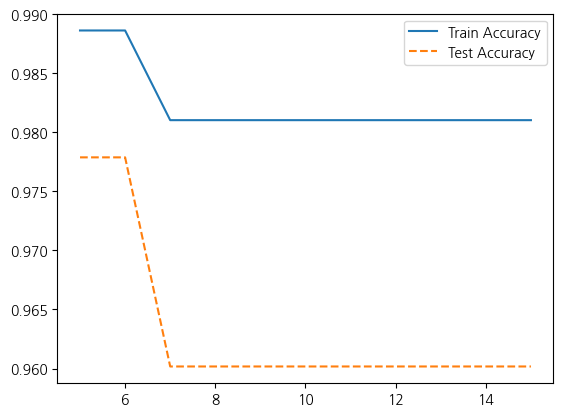

In [41]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

+ min_samples_leaf = 6으로 설정.

#### min_samples_leaf tuning 결과 시각화

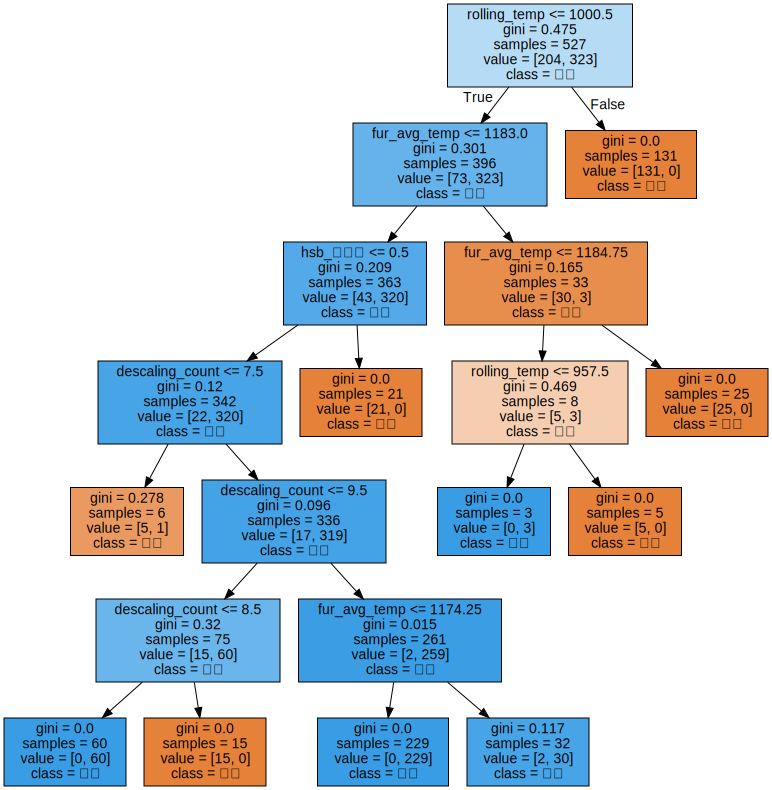

In [42]:
tree_low = DecisionTreeClassifier(max_depth=6, min_samples_split=8, min_samples_leaf=6,
                                  random_state=1538)
tree_low.fit(plate_c_train_x, plate_c_train_y)

export_graphviz(tree_low, out_file=" tree_low.dot", class_names = ["불량", "양품"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

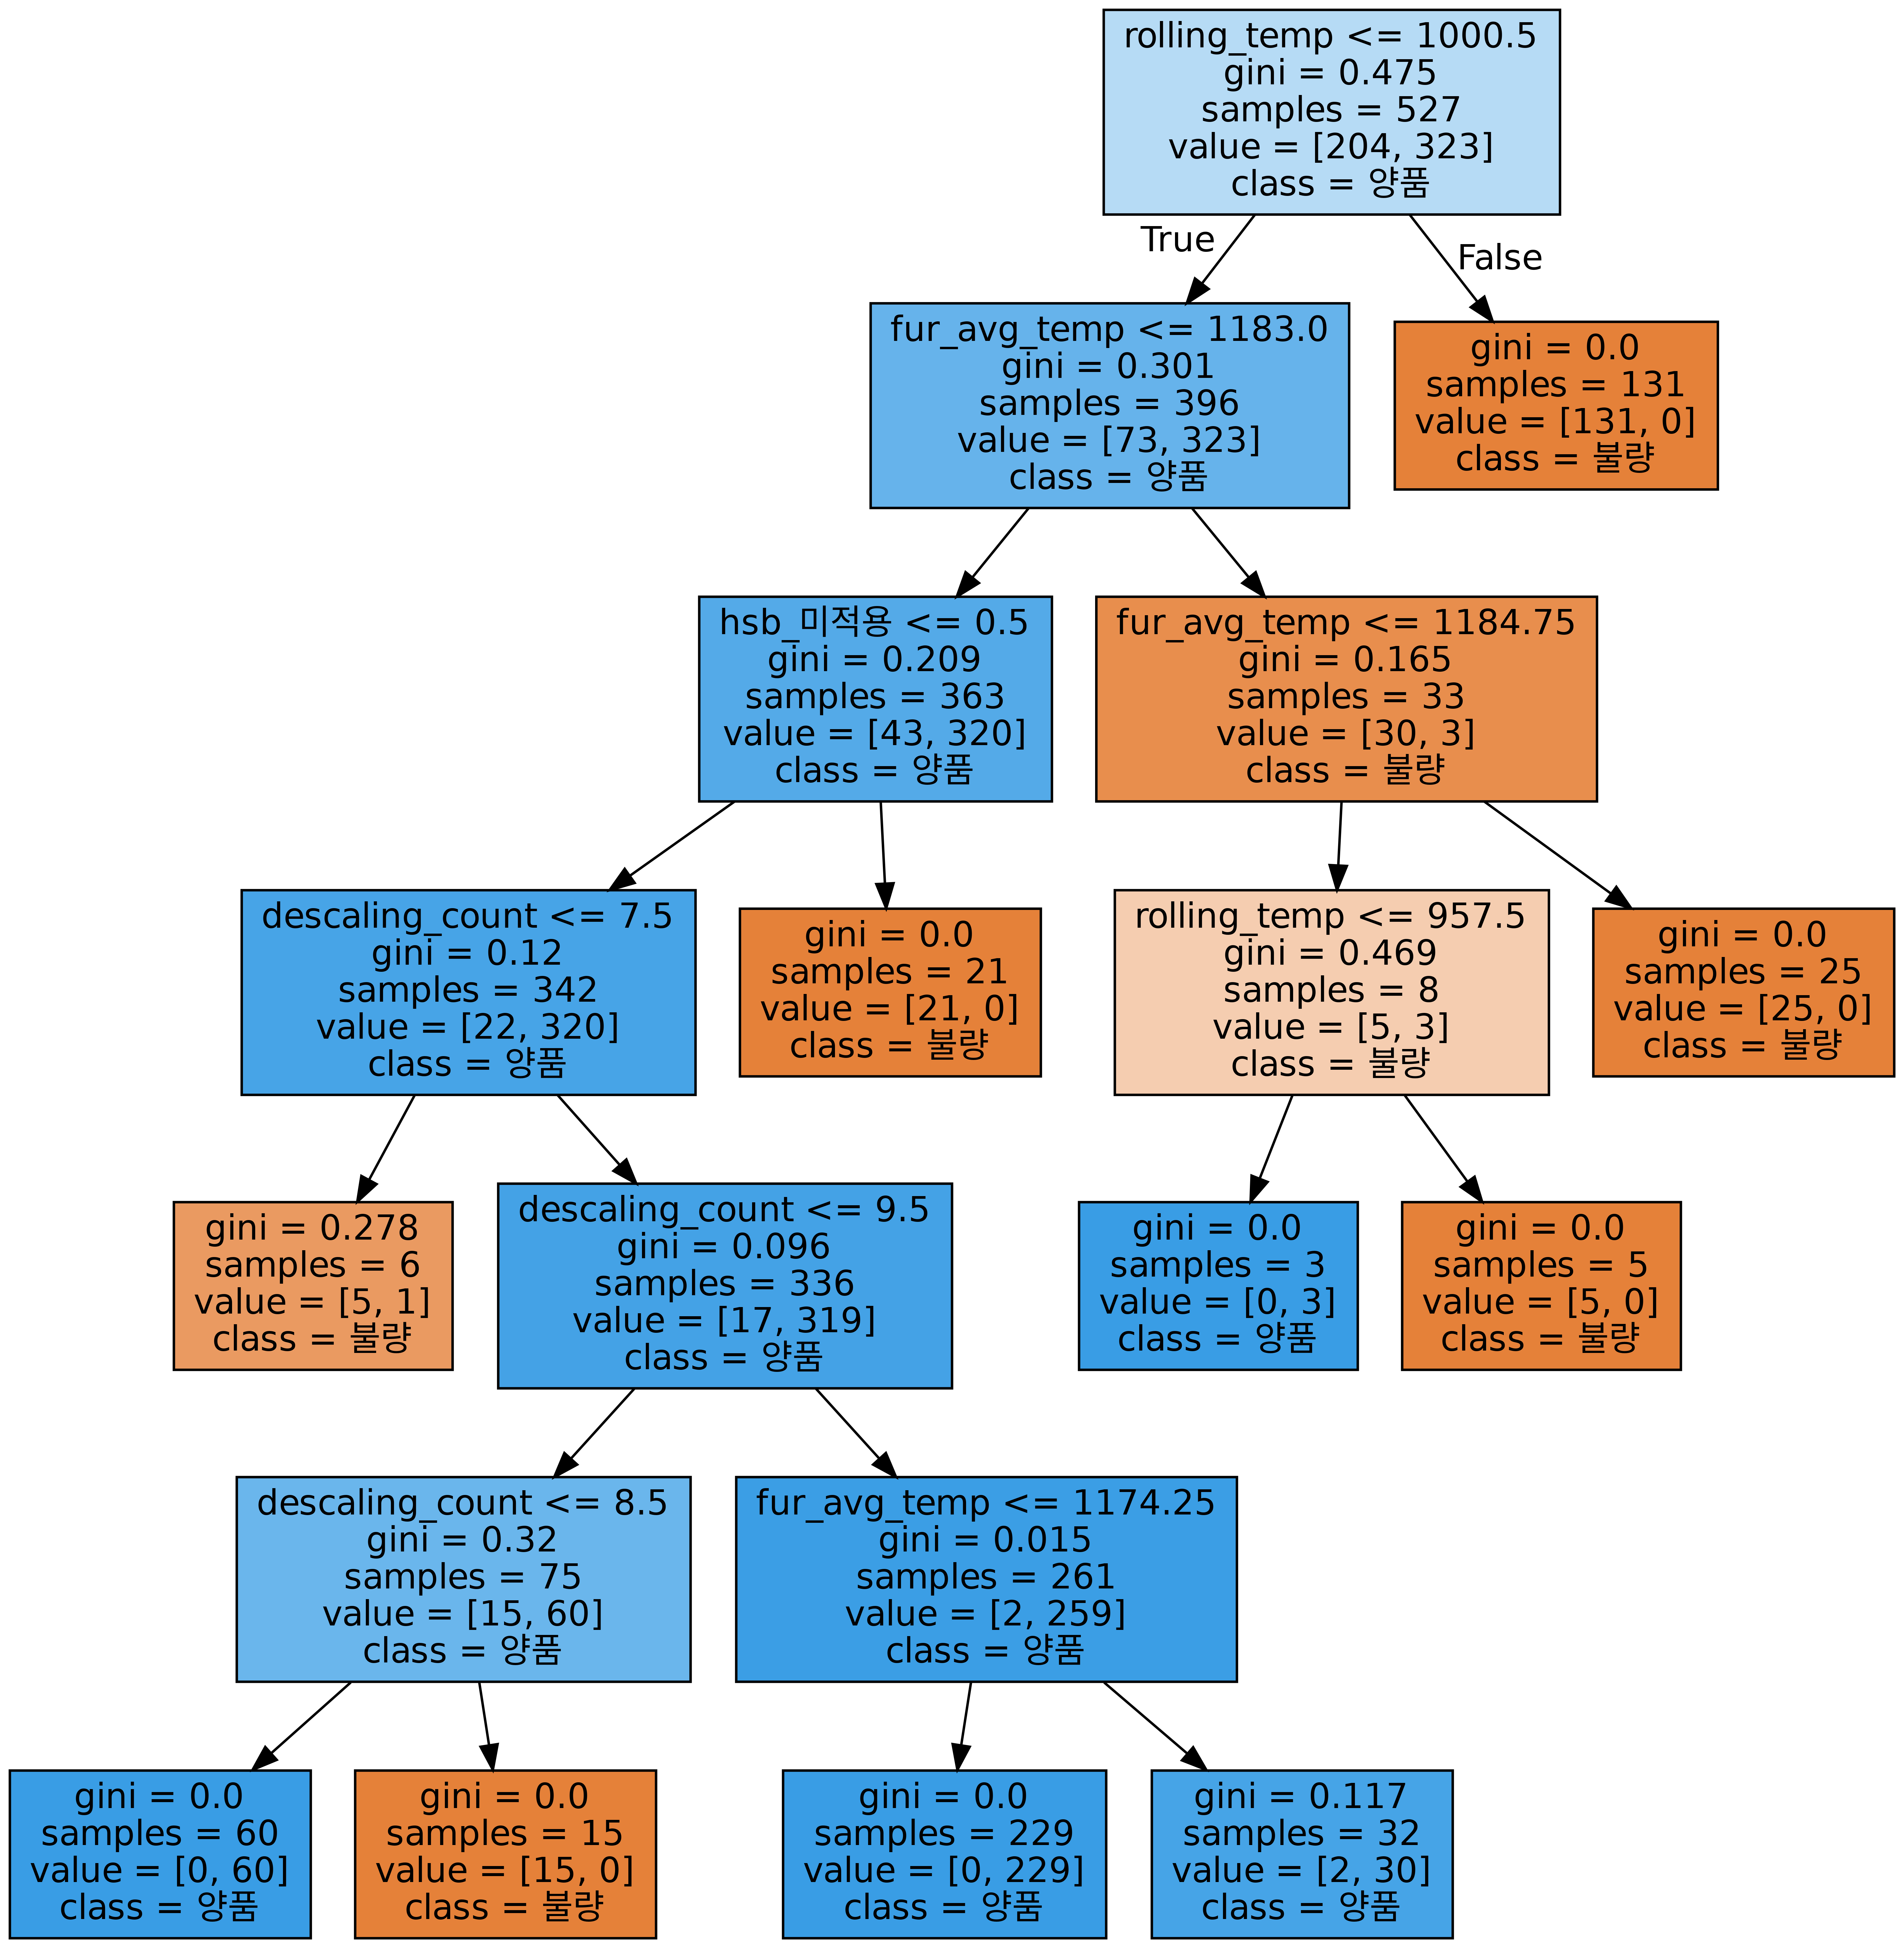

In [43]:
call(['dot', '-Tpng', 'tree_low.dot', '-o', 'tree_low.png', '-Gdpi=600'])
Image(filename = 'tree_low.png')

#### 최종 hyperparameter 선택

In [44]:
tree_final = DecisionTreeClassifier(max_depth=6, min_samples_split=8, min_samples_leaf=6,
                                    random_state=1538, criterion='gini')
tree_final.fit(plate_c_train_x, plate_c_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=8,
                       random_state=1538)

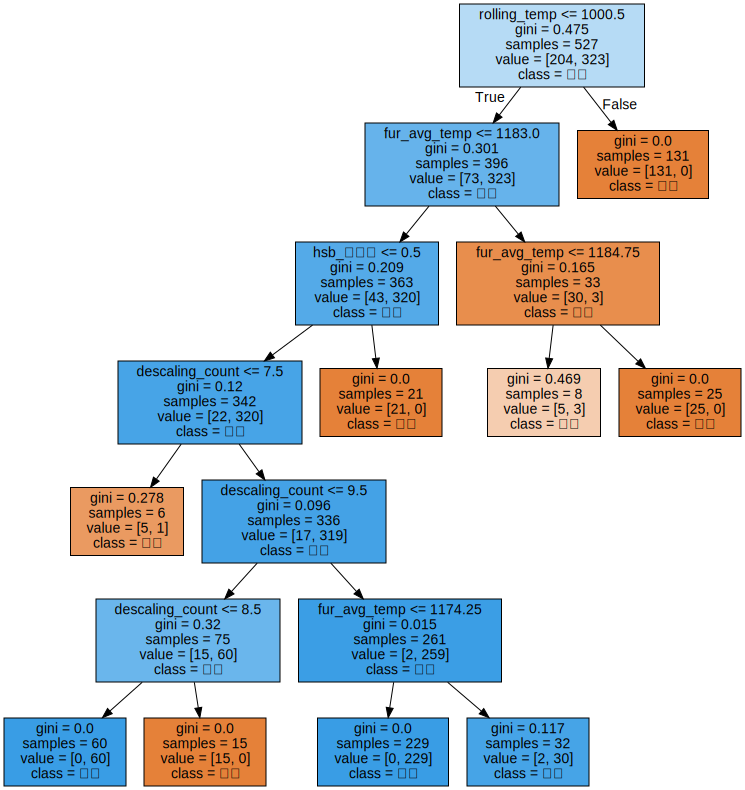

In [45]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["불량", "양품"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

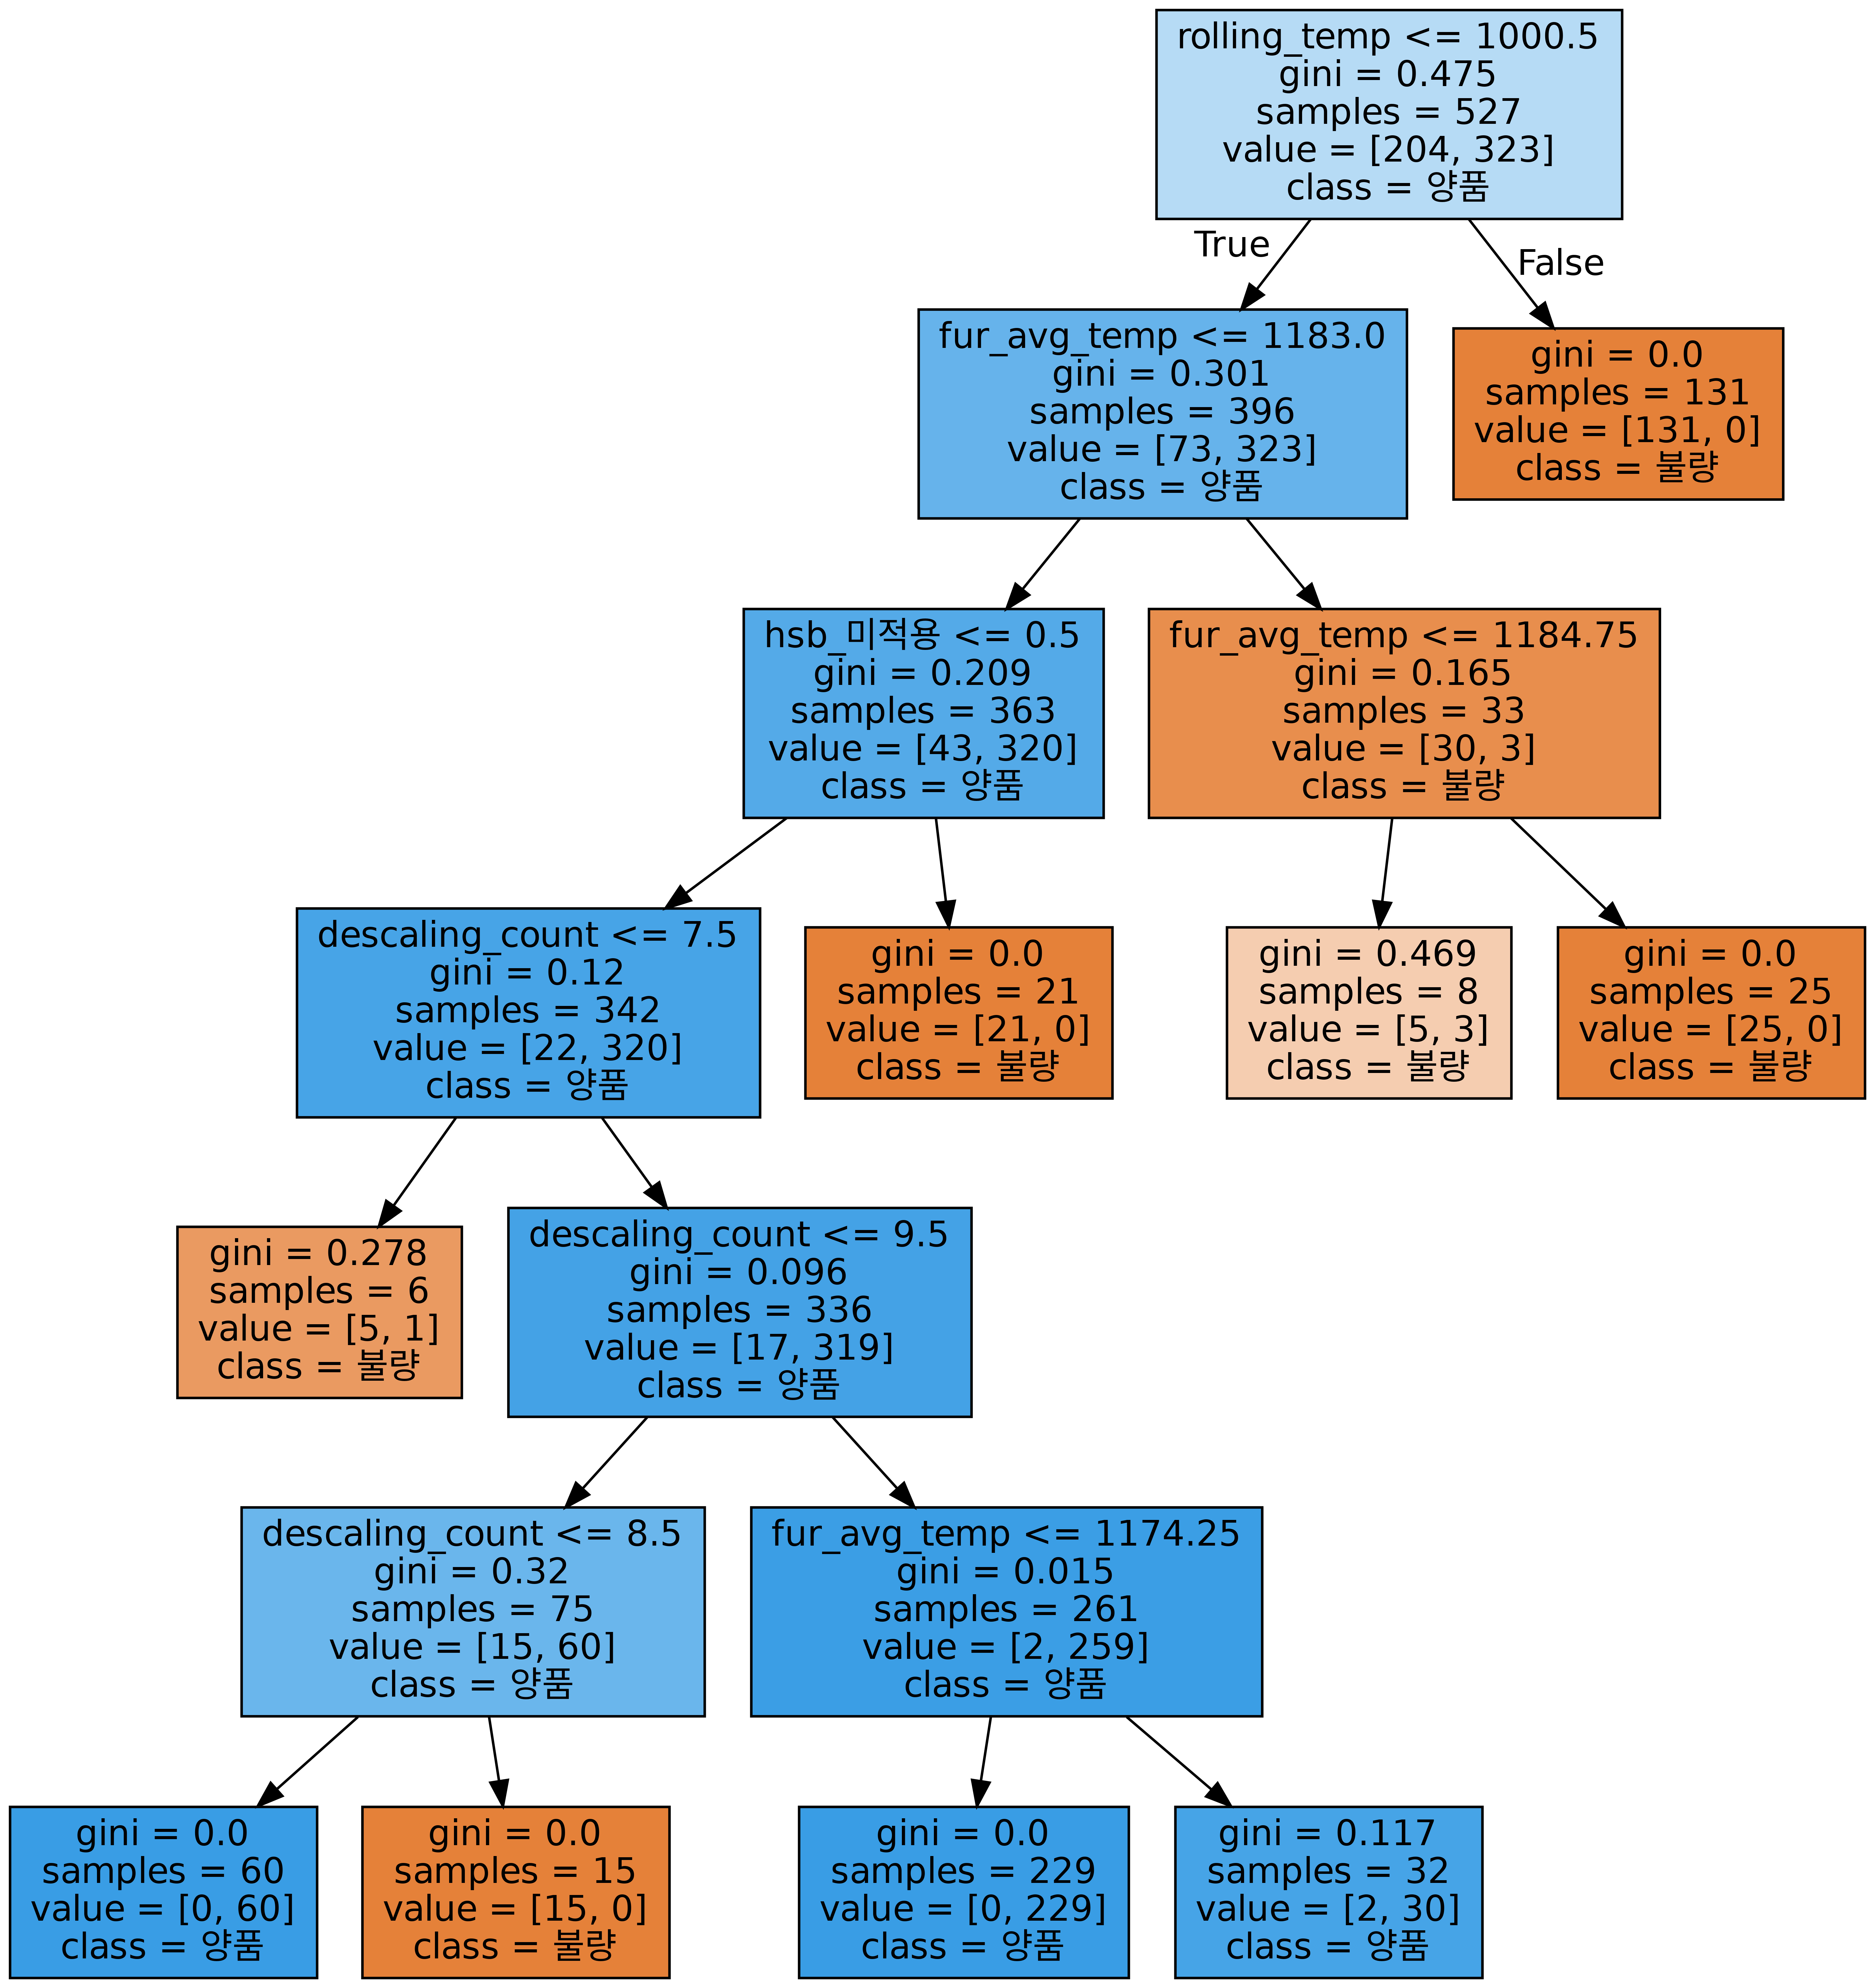

In [46]:
call(['dot', '-Tpng', 'tree_final.dot', '-o', 'tree_final.png', '-Gdpi=600'])
Image(filename = 'tree_final.png')

In [47]:
y_pred = tree_final.predict(plate_c_test_x)
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(plate_c_test_x, plate_c_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(plate_c_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(plate_c_test_y, y_pred, digits=3))

Test Accuracy: 0.978

Test Confusion matrix: 
[[ 83   3]
 [  2 138]]
              precision    recall  f1-score   support

          불량      0.976     0.965     0.971        86
          양품      0.979     0.986     0.982       140

    accuracy                          0.978       226
   macro avg      0.978     0.975     0.976       226
weighted avg      0.978     0.978     0.978       226



+ Test Accuracy = 0.978
+ 불량 기준 f1-score = 0.971

#### Feature Importance

In [48]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

Feature  Importance
2              rolling_temp       0.544
0              fur_avg_temp       0.165
3           descaling_count       0.148
5                   hsb_미적용       0.144
1            fur_total_time       0.000
4              steel_kind_C       0.000
6                    hsb_적용       0.000
7   rolling_method_CR(제어압연)       0.000
8             work_group_1조       0.000
9             work_group_2조       0.000
10            work_group_3조       0.000
11            work_group_4조       0.000

Text(0, 0.5, 'Xs')

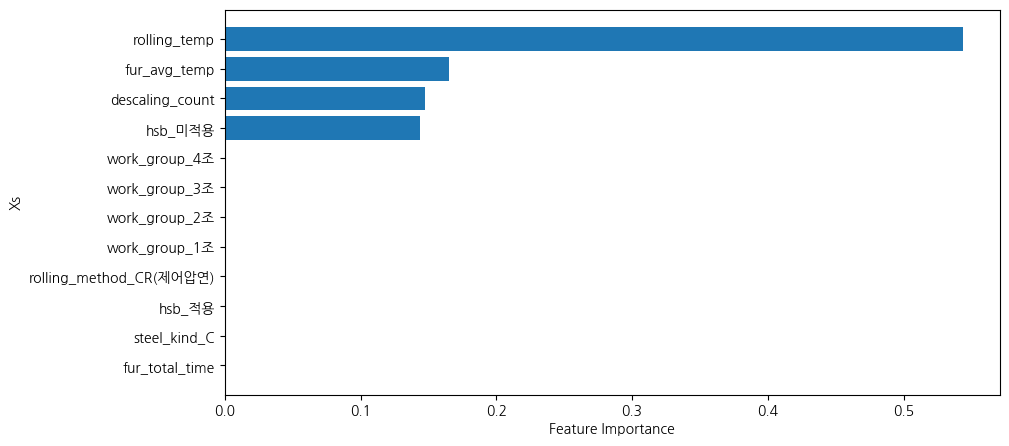

In [49]:
# 설명변수 중요도 그래프
# sort_values: 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Xs")

+ rolling_temp, fur_svg_temp, descaling_count, hsb_미적용 순으로 Feature Importance가 나타남.

#### Hyper parameter tuning: Grid Search

In [50]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(plate_c_train_x, plate_c_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

best parameter: 
{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

best score: 
0.979


In [51]:
tree_cv = DecisionTreeClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=5,
                                 random_state=1538, criterion='gini')
print("Test Accuracy for CV: {0:.3f}\n".format(tree_final.score(plate_c_test_x, plate_c_test_y)))

Test Accuracy for CV: 0.978



+ GridSearchCV 결과 - max_depth:6, min_sample_leaf:5, min_samples_split:2일 때 0.978의 Test Accuracy 확인.
+ GridSearchCV 결과(0.978)와 직접 tuning한 모델의 설명력(0.978)이 같으므로, 직접 tuning한 모델을 최종 모델로 선택.
+ 최종 모델 평가 지표: **Test Accuracy = 0.978, F1-score = 0.971**

### 2-1. Decision Tree - 티타늄 data

#### Default Model

In [52]:
tree_uncust = DecisionTreeClassifier(random_state=1538)
tree_uncust.fit(plate_t_train_x, plate_t_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(plate_t_train_x, plate_t_train_y)))

# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(plate_t_test_x, plate_t_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [53]:
# 실행옵션 확인
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1538, 'best'])


#### Hyper parameter tuning: max_depth

In [54]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(3, 12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1538)
    tree.fit(plate_t_train_x, plate_t_train_y)
    train_accuracy.append(tree.score(plate_t_train_x, plate_t_train_y))
    test_accuracy.append(tree.score(plate_t_test_x, plate_t_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [55]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      3          0.988           1.0
1      4          0.988           1.0
2      5          0.994           1.0
3      6          1.000           1.0
4      7          1.000           1.0
5      8          1.000           1.0
6      9          1.000           1.0
7     10          1.000           1.0
8     11          1.000           1.0

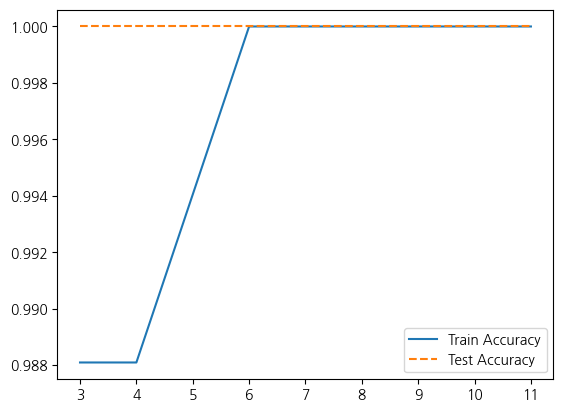

In [56]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

+ min_sample_leaf 변화에 따라 Test Accuracy의 유의미한 변화가 보이지 않으므로 tuning하지 않기로 함.

#### Hyper parameter tuning: min_samples_split

In [61]:
train_accuracy = []; test_accuracy = []
para_split = [n_split for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=v_min_samples_split, random_state=1538)
    tree.fit(plate_t_train_x, plate_t_train_y)
    train_accuracy.append(tree.score(plate_t_train_x, plate_t_train_y))
    test_accuracy.append(tree.score(plate_t_test_x, plate_t_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [62]:
# 모델 정확도 확인
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0                 2          1.000           1.0
1                 3          1.000           1.0
2                 4          1.000           1.0
3                 5          0.994           1.0
4                 6          0.994           1.0
5                 7          0.994           1.0
6                 8          0.994           1.0
7                 9          0.994           1.0
8                10          0.994           1.0
9                11          0.994           1.0
10               12          0.994           1.0
11               13          0.994           1.0
12               14          0.994           1.0
13               15          0.994           1.0

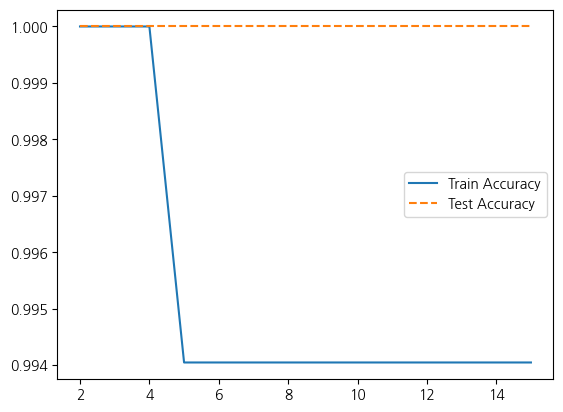

In [63]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

+ min_samples_split 변화에 따라 Test Accuracy의 유의미한 변화가 보이지 않으므로 tuning하지 않기로 함.

#### Hyper parameter tuning: min_samples_leaf

In [64]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf for n_leaf in range(1, 16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, random_state=1538)
    tree.fit(plate_t_train_x, plate_t_train_y)
    train_accuracy.append(tree.score(plate_t_train_x, plate_t_train_y))
    test_accuracy.append(tree.score(plate_t_test_x, plate_t_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [65]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0                1          1.000         1.000
1                2          0.982         0.945
2                3          0.982         0.986
3                4          0.964         0.945
4                5          0.964         0.945
5                6          0.964         0.945
6                7          0.964         0.945
7                8          0.964         0.945
8                9          0.917         0.918
9               10          0.917         0.918
10              11          0.917         0.918
11              12          0.917         0.918
12              13          0.917         0.918
13              14          0.917         0.918
14              15          0.917         0.918

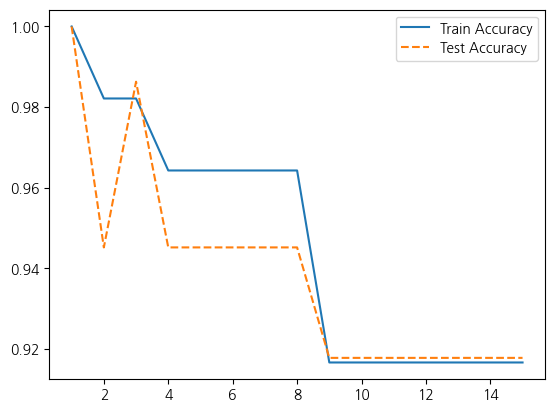

In [66]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

+ min_samples_leaf = 8로 설정.

#### 최종 모델 선택

In [67]:
tree_final = DecisionTreeClassifier(min_samples_leaf=8, random_state=1538, criterion='gini')
tree_final.fit(plate_t_train_x, plate_t_train_y)

DecisionTreeClassifier(min_samples_leaf=8, random_state=1538)

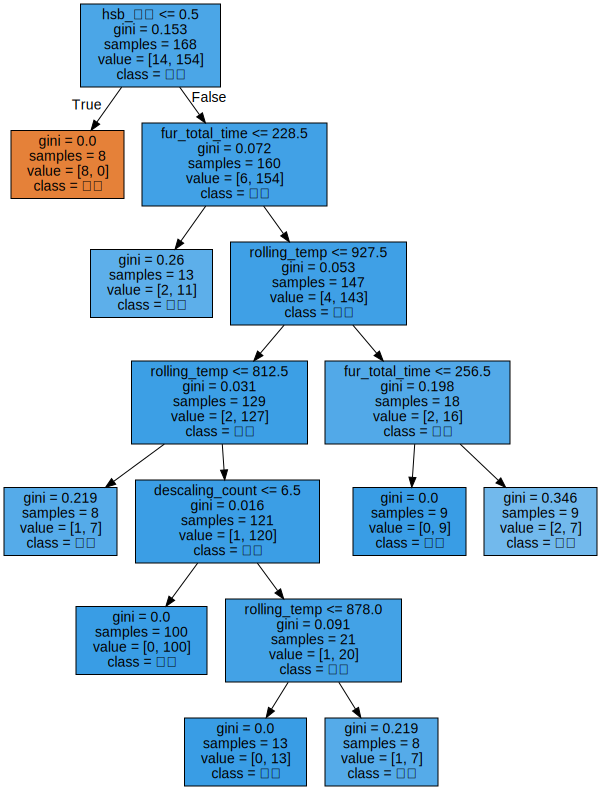

In [68]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["불량", "양품"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

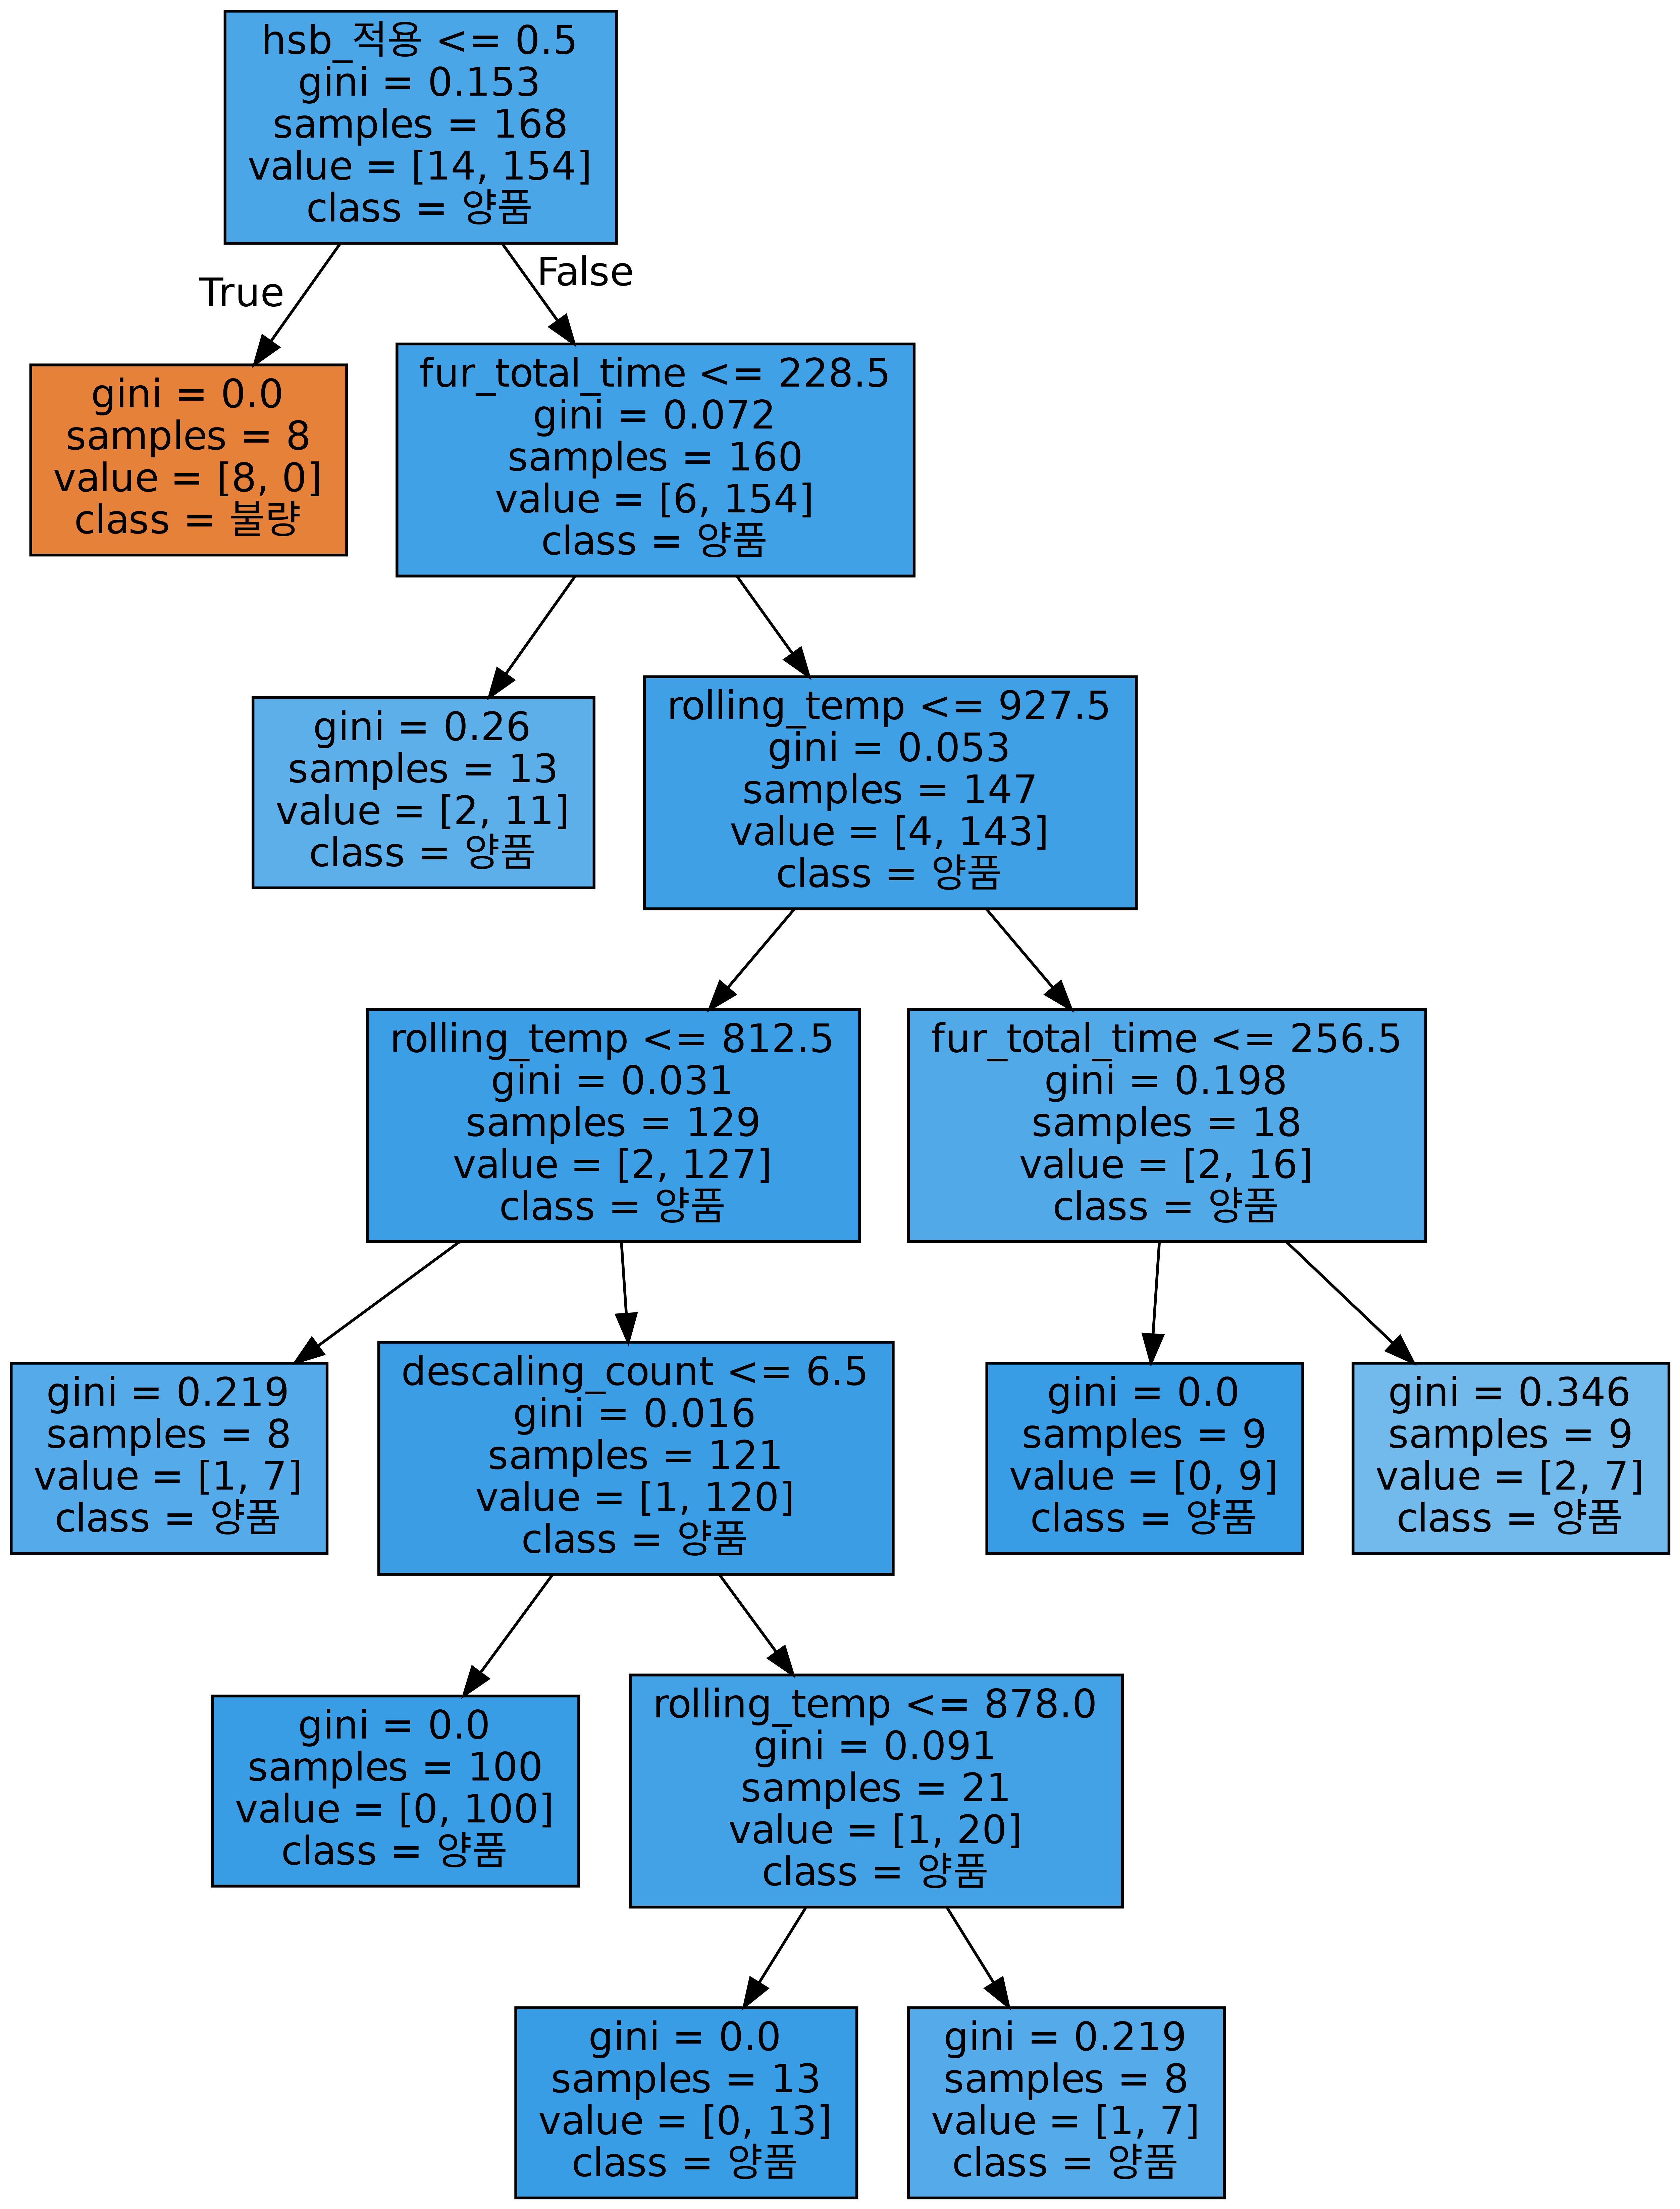

In [69]:
call(['dot', '-Tpng', 'tree_final.dot', '-o', 'tree_final.png', '-Gdpi=600'])
Image(filename = 'tree_final.png')

In [70]:
y_pred = tree_final.predict(plate_t_test_x)
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(plate_t_test_x, plate_t_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(plate_t_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(plate_t_test_y, y_pred, digits=3))

Test Accuracy: 0.945

Test Confusion matrix: 
[[ 2  4]
 [ 0 67]]
              precision    recall  f1-score   support

          불량      1.000     0.333     0.500         6
          양품      0.944     1.000     0.971        67

    accuracy                          0.945        73
   macro avg      0.972     0.667     0.736        73
weighted avg      0.948     0.945     0.932        73



+ 불량 기준 f1-score = 0.500

#### Feature Importance

In [71]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

Feature  Importance
6                    hsb_적용       0.901
1            fur_total_time       0.053
2              rolling_temp       0.041
3           descaling_count       0.005
0              fur_avg_temp       0.000
4              steel_kind_C       0.000
5                   hsb_미적용       0.000
7   rolling_method_CR(제어압연)       0.000
8             work_group_1조       0.000
9             work_group_2조       0.000
10            work_group_3조       0.000
11            work_group_4조       0.000

Text(0, 0.5, 'Xs')

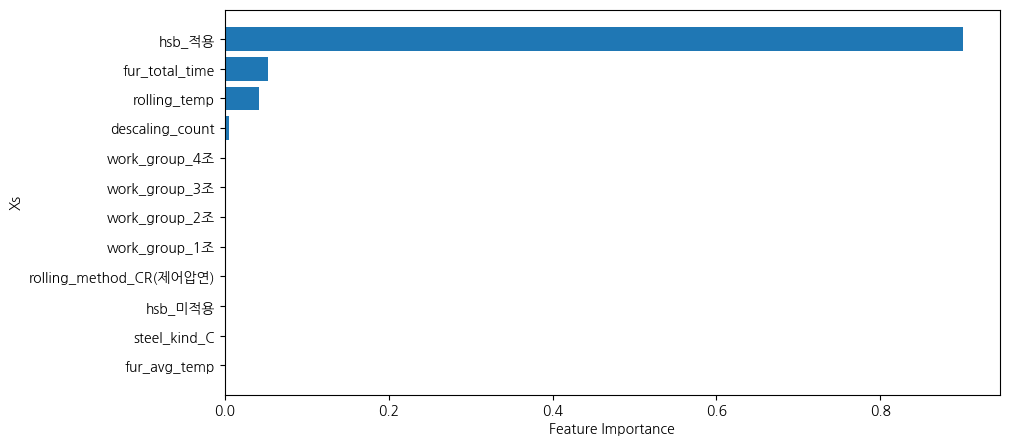

In [72]:
# 설명변수 중요도 그래프
# sort_values: 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Xs")

+ hsb_적용, descaling_count, fur_total_time, rolling_temp, descaling 순으로 Feature Importance가 확인됨.

#### Hyper parameter tuning: Grid Search

In [73]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(plate_t_train_x, plate_t_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=3)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

best score: 
0.982


In [106]:
tree_cv = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1,
                                 random_state=1538, criterion='gini')
tree_cv.fit(plate_t_test_x, plate_t_test_y)

print("Test Accuracy for CV: {0:.3f}\n".format(tree_cv.score(plate_t_test_x, plate_t_test_y)))

Test Accuracy for CV: 1.000



+ GridSearchCV 결과 - max_depth:3, min_sample_leaf:1, min_samples_split:2일 때 0.945의 Test Accuracy 확인.
+ GridSearchCV 결과(1.000)가 overfitting된 것으로 판단되어, 직접 tuning한 모델을 최종 모델로 선택.
+ 최종 모델 평가 지표: **Test Accuracy = 0.945, F1-score = 0.500**

### 2-3. Random Forest - 탄소강 data

#### Default Model

In [77]:
rf_uncust = RandomForestClassifier(random_state=1538)
rf_uncust.fit(plate_c_train_x, plate_c_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(plate_c_train_x, plate_c_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(plate_c_test_x, plate_c_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.947


In [78]:
# 실행옵션 확인
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1538, 0, False])


#### Hyper parameter tuning: n_estimators

In [79]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1538)
    rf.fit(plate_c_train_x, plate_c_train_y)
    train_accuracy.append(rf.score(plate_c_train_x, plate_c_train_y))
    test_accuracy.append(rf.score(plate_c_test_x, plate_c_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [80]:
# 모델 정확도 확인
df_accuracy_n.round(3)

n_estimators  TrainAccuracy  TestAccuracy
0             10            1.0         0.965
1             20            1.0         0.960
2             30            1.0         0.938
3             40            1.0         0.942
4             50            1.0         0.951
5             60            1.0         0.947
6             70            1.0         0.956
7             80            1.0         0.956
8             90            1.0         0.951
9            100            1.0         0.947
10           110            1.0         0.947
11           120            1.0         0.947
12           130            1.0         0.951
13           140            1.0         0.951
14           150            1.0         0.956

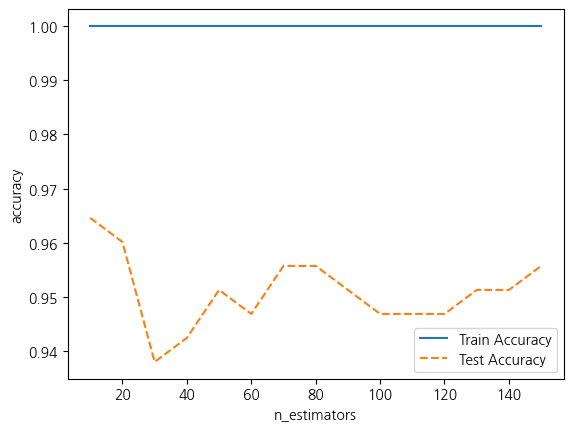

In [81]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

+ n_estimators = 80으로 설정.

#### n_estimators: 트리의 개수 변경 시 모델의 oob error 변화

In [84]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(5, 121):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1538)
    rf.fit(plate_c_train_x, plate_c_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs 

Text(0.5, 0, 'n_estimators')

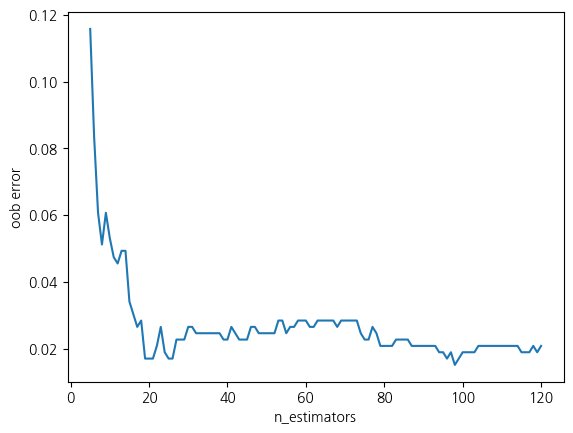

In [85]:
# 그래프로 표현
plt.plot(range(5, 121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

#### Hyper parameter tuning: max_depth

In [86]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(3, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=80, random_state=1538)
    rf.fit(plate_c_train_x, plate_c_train_y)
    train_accuracy.append(rf.score(plate_c_train_x, plate_c_train_y))
    test_accuracy.append(rf.score(plate_c_test_x, plate_c_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [87]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      3          0.954         0.929
1      4          0.956         0.929
2      5          0.956         0.929
3      6          0.975         0.938
4      7          0.991         0.942
5      8          0.996         0.938
6      9          0.998         0.938
7     10          0.998         0.942

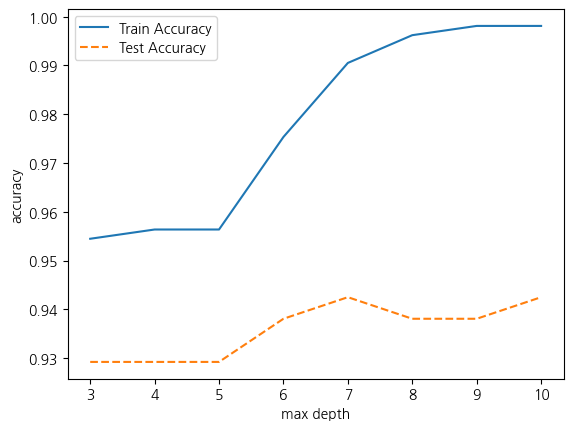

In [88]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

+ max_depth = 7으로 설정.

#### Hyper parameter tuning: min_samples_split

In [92]:
train_accuracy = []; test_accuracy = []
para_split = [n_split for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, n_estimators=80,
                                max_depth=7, random_state=1538)
    rf.fit(plate_c_train_x, plate_c_train_y)
    train_accuracy.append(rf.score(plate_c_train_x, plate_c_train_y))
    test_accuracy.append(rf.score(plate_c_test_x, plate_c_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [93]:
# 모델 정확도 확인
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0                 2          0.991         0.942
1                 3          0.987         0.942
2                 4          0.989         0.942
3                 5          0.987         0.938
4                 6          0.983         0.934
5                 7          0.985         0.934
6                 8          0.981         0.938
7                 9          0.981         0.938
8                10          0.981         0.934
9                11          0.983         0.934
10               12          0.977         0.934
11               13          0.979         0.938
12               14          0.979         0.938
13               15          0.979         0.938

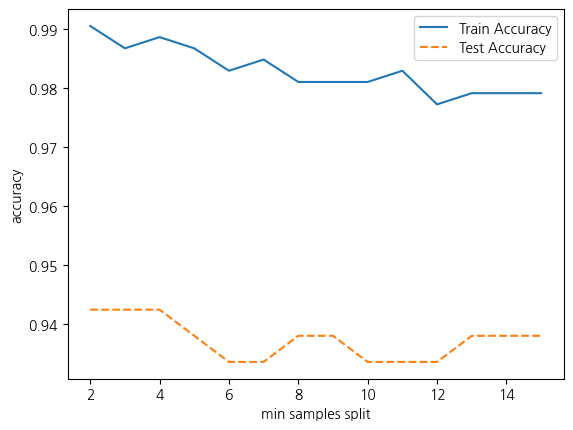

In [94]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

+ min_samples_split = 8로 지정.

#### Hyper parameter tuning: min_samples_leaf

In [98]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf for n_leaf in range(2, 16)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                                n_estimators=80, max_depth=7, min_samples_split=8, random_state=1538)
    rf.fit(plate_c_train_x, plate_c_train_y)
    train_accuracy.append(rf.score(plate_c_train_x, plate_c_train_y))
    test_accuracy.append(rf.score(plate_c_test_x, plate_c_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [99]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0                2          0.985         0.934
1                3          0.979         0.938
2                4          0.972         0.929
3                5          0.972         0.934
4                6          0.966         0.925
5                7          0.964         0.925
6                8          0.956         0.925
7                9          0.956         0.925
8               10          0.956         0.925
9               11          0.956         0.925
10              12          0.956         0.925
11              13          0.956         0.925
12              14          0.937         0.894
13              15          0.934         0.881

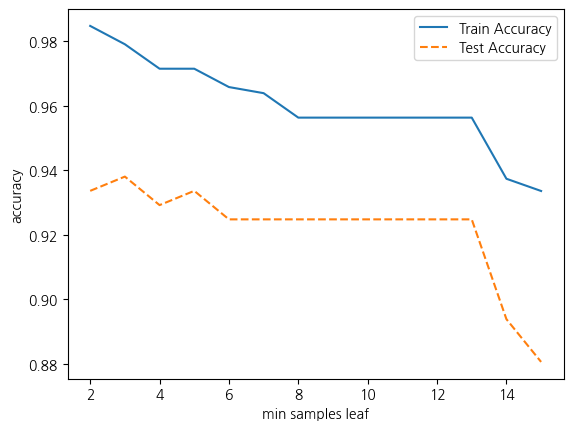

In [100]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

+ min_samples_leaf = 5로 지정.

#### 최종 hyper parameter 선택

In [101]:
rf_final = RandomForestClassifier(n_estimators=80, max_depth=7, min_samples_split=8, min_samples_leaf=5,
                                  random_state=1538, criterion='gini')
rf_final.fit(plate_c_train_x, plate_c_train_y)

y_pred = rf_final.predict(plate_c_test_x)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(plate_c_train_x, plate_c_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(plate_c_test_x, plate_c_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(plate_c_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(plate_c_test_y, y_pred, digits=3))

Accuracy on training set: 0.972
Accuracy on test set: 0.934

Confusion matrix: 
[[ 73  13]
 [  2 138]]
              precision    recall  f1-score   support

          불량      0.973     0.849     0.907        86
          양품      0.914     0.986     0.948       140

    accuracy                          0.934       226
   macro avg      0.944     0.917     0.928       226
weighted avg      0.937     0.934     0.933       226



+ 불량 기준 f1-score = 0.907

#### Feature Importance

In [102]:
# 변수명
v_feature_names = plate_c_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

Feature  Importance
2              rolling_temp       0.507
3           descaling_count       0.167
0              fur_avg_temp       0.153
5                   hsb_미적용       0.071
6                    hsb_적용       0.041
1            fur_total_time       0.034
8             work_group_1조       0.014
11            work_group_4조       0.008
10            work_group_3조       0.002
9             work_group_2조       0.001
4              steel_kind_C       0.000
7   rolling_method_CR(제어압연)       0.000

Text(0, 0.5, 'Xs')

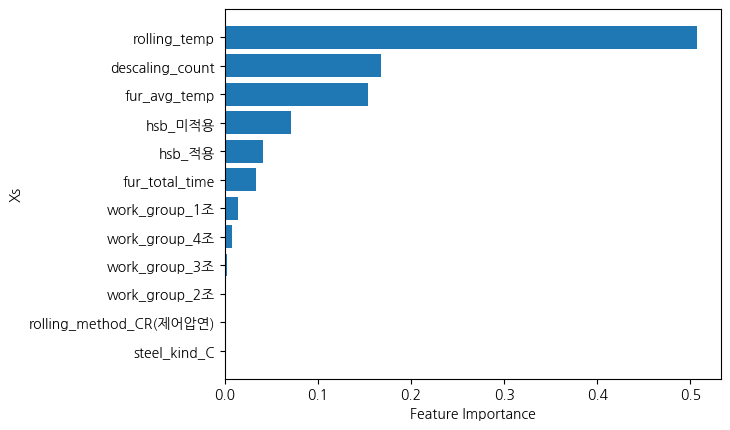

In [103]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Xs")

+ rolling_temp, descaling_count, fur_avg_temp, hsb_미적용, fur_total_time 순으로 Feature Importance가 확인됨.

#### Hyper parameter tuning: GridSearchCV

In [104]:
estimator = RandomForestClassifier(random_state=1538)

# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth,
              "min_samples_leaf": para_leaf}

# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(plate_c_train_x, plate_c_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=1538)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 2}

best score: 
0.954


In [107]:
tree_cv = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                 random_state=1538, criterion='gini')
tree_cv.fit(plate_t_test_x, plate_t_test_y)

print("Test Accuracy for CV: {0:.3f}\n".format(tree_cv.score(plate_t_test_x, plate_t_test_y)))

Test Accuracy for CV: 0.986



+ GridSearchCV 결과 - max_depth:20, min_sample_leaf:2일 때 0.986 Test Accuracy 확인.
+ GridSearchCV 결과(0.986)가 overfitting된 것으로 판단되어, 직접 tuning한 모델을 최종 모델로 선택.
+ 최종 모델 평가 지표: **Test Accuracy = 0.934, F1-score = 0.907**

### 2-4. Random Forest - 티타늄 data

#### Default Model

In [108]:
rf_uncust = RandomForestClassifier(random_state=1538)
rf_uncust.fit(plate_t_train_x, plate_t_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(plate_t_train_x, plate_t_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(plate_t_test_x, plate_t_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.959


In [109]:
# 실행옵션 확인
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1538, 0, False])


#### Hyper parameter tuning: n_estimators

In [110]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1538)
    rf.fit(plate_t_train_x, plate_t_train_y)
    train_accuracy.append(rf.score(plate_t_train_x, plate_t_train_y))
    test_accuracy.append(rf.score(plate_t_test_x, plate_t_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [111]:
# 모델 정확도 확인
df_accuracy_n.round(3)

n_estimators  TrainAccuracy  TestAccuracy
0             10          0.994         0.973
1             20          0.994         0.959
2             30          1.000         0.986
3             40          1.000         0.959
4             50          1.000         0.959
5             60          1.000         0.959
6             70          1.000         0.959
7             80          1.000         0.973
8             90          1.000         0.959
9            100          1.000         0.959
10           110          1.000         0.959
11           120          1.000         0.945
12           130          1.000         0.945
13           140          1.000         0.959
14           150          1.000         0.959

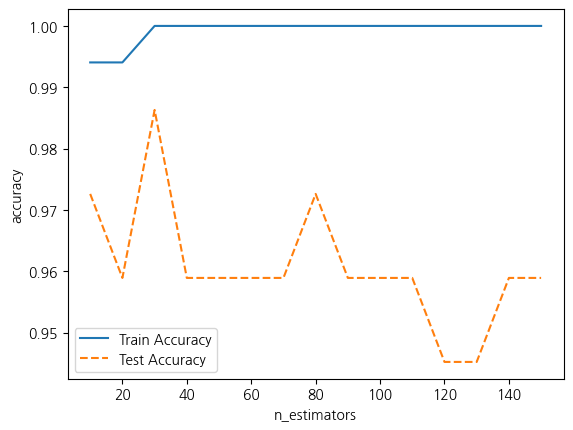

In [112]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

+ n_estimators = 80으로 설정.

#### n_estimators: 트리의 개수 변경 시 모델의 oob error 변화

In [113]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(5, 121):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state=1538)
    rf.fit(plate_t_train_x, plate_t_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Text(0.5, 0, 'n_estimators')

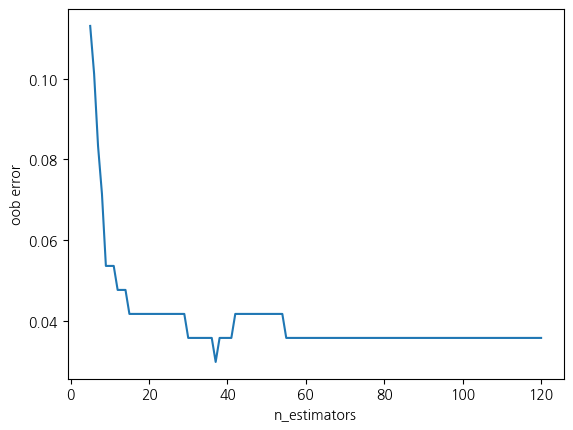

In [114]:
# 그래프로 표현
plt.plot(range(5, 121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

#### Hyper parameter tuning: max_depth

In [115]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(3, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=80, random_state=1538)
    rf.fit(plate_t_train_x, plate_t_train_y)
    train_accuracy.append(rf.score(plate_t_train_x, plate_t_train_y))
    test_accuracy.append(rf.score(plate_t_test_x, plate_t_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [116]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      3          0.964         0.945
1      4          0.988         0.945
2      5          0.994         0.945
3      6          0.994         0.959
4      7          0.994         0.973
5      8          1.000         0.973
6      9          1.000         0.973
7     10          1.000         0.973

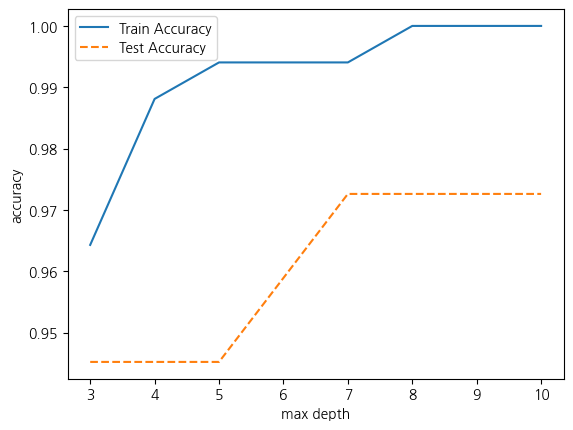

In [117]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

+ max_depth = 7으로 지정.

#### Hyper parameter tuning: min_samples_split

In [119]:
train_accuracy = []; test_accuracy = []
para_split = [n_split for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, n_estimators=80,
                                max_depth=7, random_state=1538)
    rf.fit(plate_t_train_x, plate_t_train_y)
    train_accuracy.append(rf.score(plate_t_train_x, plate_t_train_y))
    test_accuracy.append(rf.score(plate_t_test_x, plate_t_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [120]:
# 모델 정확도 확인
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0                 2          0.994         0.973
1                 3          0.994         0.945
2                 4          0.988         0.945
3                 5          0.988         0.945
4                 6          0.988         0.959
5                 7          0.988         0.945
6                 8          0.988         0.945
7                 9          0.988         0.945
8                10          0.988         0.945
9                11          0.988         0.945
10               12          0.988         0.945
11               13          0.988         0.945
12               14          0.988         0.945
13               15          0.988         0.945

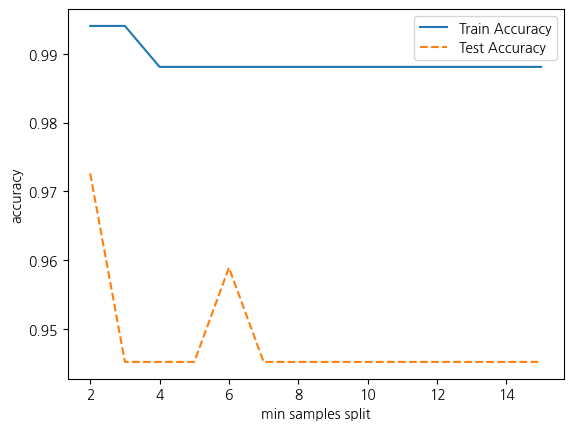

In [121]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

+ min_samples_split = 6으로 설정.

#### Hyper parameter tuning: min_samples_leaf

In [122]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf for n_leaf in range(2, 16)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, n_estimators=80,
                                max_depth=7, min_samples_split=6, random_state=1538)
    rf.fit(plate_t_train_x, plate_t_train_y)
    train_accuracy.append(rf.score(plate_t_train_x, plate_t_train_y))
    test_accuracy.append(rf.score(plate_t_test_x, plate_t_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [123]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0                2          0.964         0.945
1                3          0.964         0.945
2                4          0.964         0.945
3                5          0.917         0.918
4                6          0.917         0.918
5                7          0.917         0.918
6                8          0.917         0.918
7                9          0.917         0.918
8               10          0.917         0.918
9               11          0.917         0.918
10              12          0.917         0.918
11              13          0.917         0.918
12              14          0.917         0.918
13              15          0.917         0.918

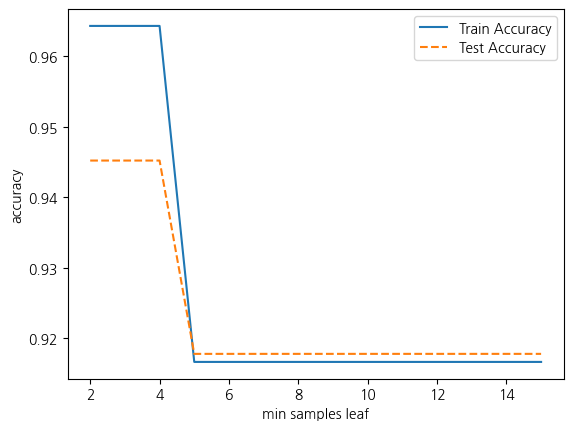

In [124]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

+ min_samples_leaf = 4로 설정.

### 최종 모델

In [125]:
# 최종 모델
rf_final = RandomForestClassifier(n_estimators=80, max_depth=7, min_samples_split=6, min_samples_leaf = 4,
                                  random_state=1538, criterion='gini')
rf_final.fit(plate_t_train_x, plate_t_train_y)

y_pred = rf_final.predict(plate_t_test_x)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(plate_t_train_x, plate_t_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(plate_t_test_x, plate_t_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(plate_t_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(plate_t_test_y, y_pred, digits=3))

Accuracy on training set: 0.964
Accuracy on test set: 0.945

Confusion matrix: 
[[ 2  4]
 [ 0 67]]
              precision    recall  f1-score   support

          불량      1.000     0.333     0.500         6
          양품      0.944     1.000     0.971        67

    accuracy                          0.945        73
   macro avg      0.972     0.667     0.736        73
weighted avg      0.948     0.945     0.932        73



+ 불량 기준 f1-score = 0.500

#### Feature Importance

In [126]:
# 변수명
v_feature_names = plate_t_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

Feature  Importance
5                     hsb_미적용       0.296
1              fur_total_time       0.172
2                rolling_temp       0.155
0                fur_avg_temp       0.144
6                      hsb_적용       0.134
10              work_group_2조       0.026
3             descaling_count       0.026
11              work_group_3조       0.019
7     rolling_method_CR(제어압연)       0.012
9               work_group_1조       0.008
8   rolling_method_TMCP(온도제어)       0.008
4                steel_kind_T       0.000

Text(0, 0.5, 'Xs')

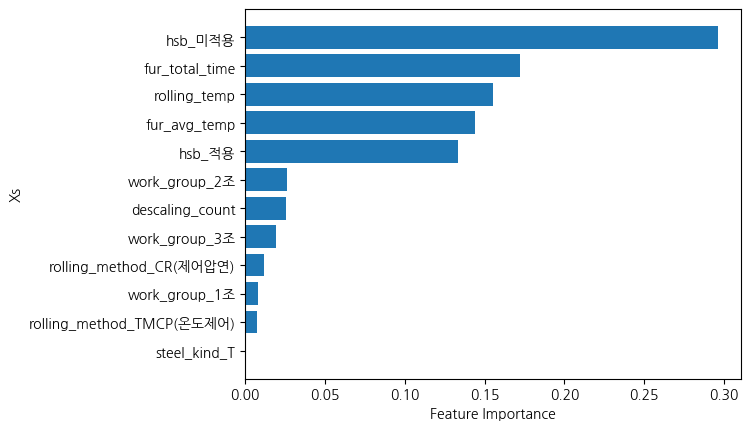

In [127]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Xs")

+ hsb_미적용, fur_total_time, rolling_temp, fur_avg_temp, hsb_적용 순으로 Feature Importance 확인.

#### Hyper parameter tuning: GridSearchCV

In [128]:
estimator = RandomForestClassifier(random_state=1538)

# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth,
              "min_samples_leaf": para_leaf}

# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(plate_t_train_x, plate_t_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=3, min_samples_leaf=2, random_state=1538)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 2}

best score: 
0.965


In [131]:
rf_cv = RandomForestClassifier(max_depth=3, min_samples_leaf=2,
                               random_state=1538, criterion='gini')
rf_cv.fit(plate_t_test_x, plate_t_test_y)

print("Test Accuracy for CV: {0:.3f}\n".format(rf_cv.score(plate_t_test_x, plate_t_test_y)))

y_pred = rf_cv.predict(plate_t_test_x)
print(classification_report(plate_t_test_y, y_pred, digits=3))

Test Accuracy for CV: 0.918

              precision    recall  f1-score   support

          불량      0.000     0.000     0.000         6
          양품      0.918     1.000     0.957        67

    accuracy                          0.918        73
   macro avg      0.459     0.500     0.479        73
weighted avg      0.842     0.918     0.878        73



/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+ GridSearchCV 결과 - max_depth:3, min_sample_leaf:2일 때 0.986 Test Accuracy 확인.
+ 직접 tuning한 모델을 최종 모델로 선택.
+ 최종 모델 평가 지표: **Test Accuracy = 0.945, F1-score = 0.500**